In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\alokk\Desktop\csv\iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
x = df.drop(['variety'],axis = 1)
y = df['variety']
x 
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [5]:
x_c = StandardScaler().fit_transform(x)
x_c[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [8]:
fea = x_c.T
cov_mat = np.cov(fea)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
values , vectors = np.linalg.eig(cov_mat)

ex_var = []
for i in range(len(values)):
    ex_var.append((values[i] / np.sum(values)) * 100)

print("Explained variance of each dimension", ex_var)

Explained variance of each dimension [72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]


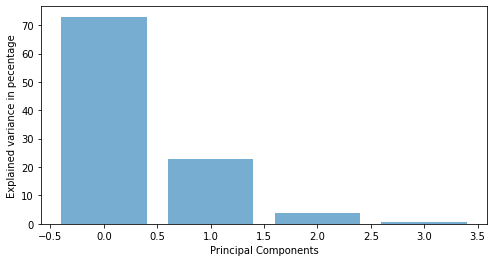

In [11]:
plt.figure(figsize =(8,4))
plt.bar(range(4),ex_var, alpha = 0.6)
plt.ylabel('Explained variance in pecentage')
plt.xlabel('Principal Components')
plt.show()

In [16]:
pro1 = x_c.dot(vectors.T[0])
pro2 = x_c.dot(vectors.T[1])
res = pd.DataFrame(pro1, columns = ['PC1'])
res['PC2'] = pro2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,Setosa
1,-2.080961,0.674134,Setosa
2,-2.364229,0.341908,Setosa
3,-2.299384,0.597395,Setosa
4,-2.389842,-0.646835,Setosa


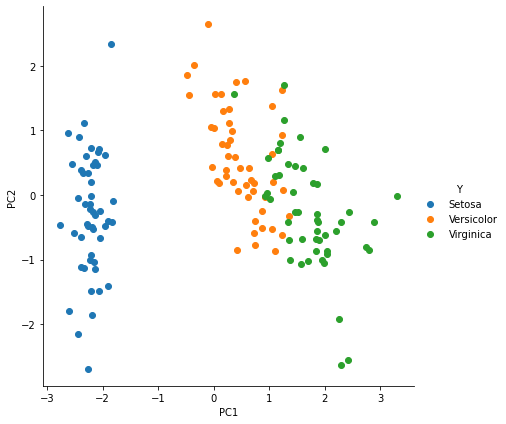

In [22]:
sns.FacetGrid(res, hue="Y",height = 6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()